# STAT 345: Nonparametric Statistics

## Lesson 04.1: The Wilcoxon Signed-Rank Test

**Reading: Conover Section 5.7**

*Prof. John T. Whelan*

Thursday 6 February 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

- Last week: sign test for paired data $\{({\color{royalblue}{X_i}},{\color{royalblue}{Y_i}})\}$.

- Statistic just used signs of differences
${\color{royalblue}{D_i}}={\color{royalblue}{Y_i}}-{\color{royalblue}{X_i}}$. 

- Discards other information to be robust to outliers, but could keep a little more...

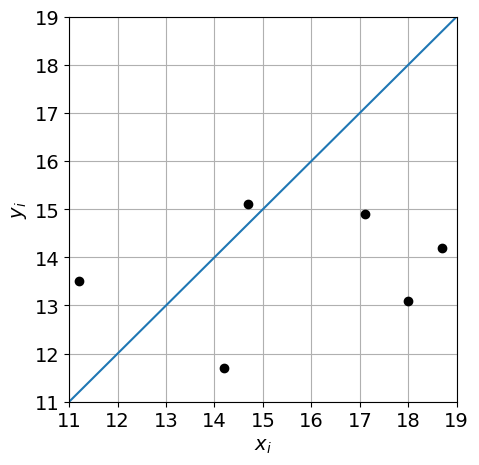

In [3]:
x_i = np.array([18.0, 18.7, 14.7, 17.1, 11.2, 14.2]); y_i = np.array([13.1, 14.2, 15.1, 14.9, 13.5, 11.7])
plt.figure().set_size_inches(5,5);plt.plot(x_i,y_i,'ko'); plt.plot([11,19],[11,19]);  
plt.xlim(11,19); plt.ylim(11,19);  plt.xticks(np.arange(11,20));plt.grid();plt.xlabel('$x_i$');plt.ylabel('$y_i$');

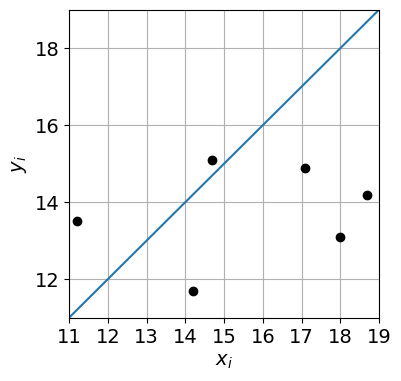

In [4]:
plt.figure().set_size_inches(4,4);plt.plot(x_i,y_i,'ko'); plt.plot([11,19],[11,19]);  
plt.xlim(11,19); plt.ylim(11,19);  plt.xticks(np.arange(11,20));plt.grid();plt.xlabel('$x_i$');plt.ylabel('$y_i$');

Sign test sees 2 points above line ($d_i>0$), 4 below ($d_i<0$) so two-sided
$p$-value is
$$P({\color{royalblue}{N_{+}}}{\mathbin{\le}}2) + P({\color{royalblue}{N_{+}}}{\mathbin{\ge}}4) = P({\color{royalblue}{N_{+}}}{\mathbin{\ne}}3)
  = 1 - \binom{6}{3} \frac{1}{2^6} = 1 - \frac{20}{64} = 0.6875$$

In [5]:
2*stats.binom(6,0.5).cdf(2)

0.6875

- But there's more to the story than counting $+$ and $-$ differences.
- The points below the line are farther away than those above it.

- Signed rank test says rank absolute diffs ${\left\lvert y_i-x_i\right\rvert}$ from smallest to largest then add the ranks of the positive ones.

In [6]:
d_i = y_i - x_i; d_i

array([-4.9, -4.5,  0.4, -2.2,  2.3, -2.5])

In [7]:
idx_i = np.argsort(np.abs(d_i))
d_i[idx_i]

array([ 0.4, -2.2,  2.3, -2.5, -4.5, -4.9])

- The positive differences are $0.4$ (which is the smallest) and $2.3$
(which is the third smallest), so in this case the test statistic is
$t^{+}=1+3=4$.

It's straightforward but tedious to figure out the rank corresponding to each value $\lvert d_i\rvert$, but fortunately SciPy provides a function that does it for us:

In [8]:
R_i = stats.rankdata(np.abs(d_i)); d_i,R_i

(array([-4.9, -4.5,  0.4, -2.2,  2.3, -2.5]), array([6., 5., 1., 2., 3., 4.]))

Mapping of absolute differences $\{\left\lvert d_i\right\rvert\}$ to ranks $\{R_i\}$ is the **rank transformation** and it's the basis for the whole branch of nonparametric statistics which is the focus of chapter five of Conover.

Can use boolean array to pick out ranks $\{R_i\}$ corresponding to positive differences $d_i>0$:

In [9]:
posranks_i = R_i[d_i > 0]; d_i > 0, posranks_i

(array([False, False,  True, False,  True, False]), array([1., 3.]))

In [10]:
tp = posranks_i.sum(); tp

4.0

- For a $p$-value, we need the **null distribution** of the statistic $\color{royalblue}{T^{+}}$.

- $H_0$ says each difference equally likely to be positive or negative.

- $2^n$ possible sequences of $+$ & $-$; under $H_0$ all equally likely. Here, $n=6$, so $2^n=2^6=64$.

Have to ask how many give $t^{+}\le 4$.  Few enough of them that we can just list them:
<table>
        <tr>
   <td>$-$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$0$</td>
        </tr>
        <tr>
   <td>$+$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$1$</td>
        </tr>
        <tr>
   <td>$-$</td><td>$+$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$2$</td>
        </tr>
        <tr>
   <td>$-$</td><td>$-$</td><td>$+$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$3$</td>
        </tr>
        <tr>
   <td>$+$</td><td>$+$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$1+2=3$</td>
        </tr>
        <tr>
   <td>$-$</td><td>$-$</td><td>$-$</td><td>$+$</td><td>$-$</td><td>$-$</td><td>$4$</td>
        </tr>
        <tr>
   <td>$+$</td><td>$-$</td><td>$+$</td><td>$-$</td><td>$-$</td><td>$-$</td><td>$1+3=4$</td>
        </tr>
</table>

- $7$ out of $64$ outcomes with $t^{+}\le 4$, & another $7$ equally extreme high values, so the $p$-value is $\frac{14}{64}=0.21875$.  Still not "statistically significant", but less than the $p=0.6875$ from the sign test.

Usually too many possibilities to count; ways to get null distribution:

- Have a computer count them for you

- Use tabulated values from software or e.g., Appendix A12 of Conover

- If $n$ is large, use the normal approximation.

We'll generally use the software table option, but enlightening to consider the DIY computer counting method

We know there are $2^n$ possibilities to consider, so we make a list of all of them.  (Could do it brute force with loops, but some pythonic magic simplifies it for us):

In [11]:
n = len(d_i)
F_Ir = np.array([[np.right_shift(d,i) % 2 for i in range(n)] for d in range(2**n)])
F_Ir.shape

(64, 6)

We have $64$ different realizations labelled by $I$, of a set of six "flags" $\{F^{(I)}_r\}$, of value $1$ or $0$, telling if the difference of rank $r$ is $+$ or $-$.  Sort of like Monte Carlo, but not random; we enumerated the $64$ equally likely possibilities:

In [12]:
F_Ir

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
 

And we can make an ensemble of equally likely statistic values $\{T^{+}{}^{(I)}\}$ by taking
$$
T^{+}{}^{(I)} = \sum_{r=1}^n r F^{(I)}_r
$$

In [13]:
R_xr = np.arange(1,n+1)[None,:]; R_xr.shape, R_xr

((1, 6), array([[1, 2, 3, 4, 5, 6]]))

In [14]:
Tp_I = (R_xr*F_Ir).sum(axis=-1); Tp_I

array([ 0,  1,  2,  3,  3,  4,  5,  6,  4,  5,  6,  7,  7,  8,  9, 10,  5,
        6,  7,  8,  8,  9, 10, 11,  9, 10, 11, 12, 12, 13, 14, 15,  6,  7,
        8,  9,  9, 10, 11, 12, 10, 11, 12, 13, 13, 14, 15, 16, 11, 12, 13,
       14, 14, 15, 16, 17, 15, 16, 17, 18, 18, 19, 20, 21])

$64$ equally likely possibilities; values appearing multiple times are more likely.  Count w/a histogram:

In [15]:
tpmin = min(Tp_I); tpmax = max(Tp_I);count_t,bin_t = np.histogram(Tp_I,bins=np.arange(tpmin,tpmax+2));count_t,bin_t

(array([1, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 3, 2, 2, 1, 1, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]))

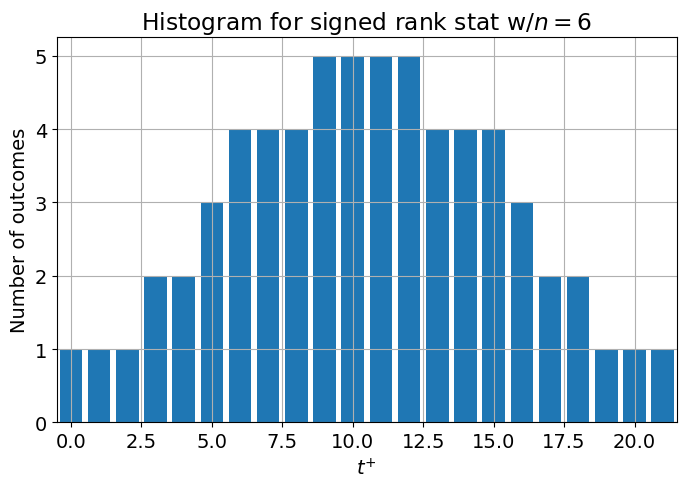

In [16]:
tp_t = bin_t[:-1]; plt.bar(tp_t,count_t,align='center');
plt.xlim(tpmin-0.5,tpmax+0.5);plt.xlabel('$t^{+}$');plt.ylabel('Number of outcomes');
plt.title('Histogram for signed rank stat w/$n=%d$' % n);plt.grid();

We can divide by $2^n=64$ to get the pmf, and we can use this (either
the histogram or the original array) to get the $p$ value as above:

In [17]:
np.sum(Tp_I <= tp)

7

In [18]:
2*np.mean(Tp_I <= tp)

0.21875

Unfortunately, this solution doesn’t scale very well. For $n=30$, there
are a billion outcomes, and the associated “giga-” starts to eat up memory.

These things are tabulated, though.  Scipy doesn't expose it as a standard distribution I've written a wrapper in the file `wilcoxondists.py` which wraps it:

For example, here is the probability of the rank-sum statistic equalling $4$ when $n=6$:

In [19]:
from wilcoxondists import signrankpmf, signrankcdf, signrankppf

In [20]:
signrankpmf(4,6)

0.03125

If you use R, there's an analogous function `dsignrank()`

We can also plot the pmf

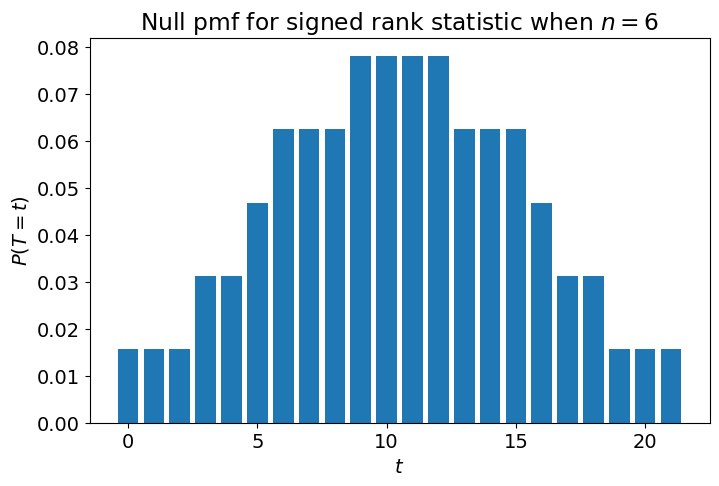

In [21]:
n = 6; t_t = np.arange(n*(n+1)//2+1); pmf_t = signrankpmf(t_t,n)
plt.bar(t_t,pmf_t,align='center');
plt.title('Null pmf for signed rank statistic when $n=%d$' % n);plt.xlabel('$t$');plt.ylabel(r'$P(T=t)$');

We see we get the same plot as above, but normalized as a probability mass function.

To get the $p$ value which we did above by hand, we use the cdf to extract the probability that ${\color{royalblue}{T^{+}}}\le 4$:

In [22]:
signrankcdf(4,n)

0.109375

In [23]:
2*signrankcdf(4,n)

0.21875

And we see the $p$-value is $0.21875$ as above.

In R, the cdf is called `psignrank()`

I've also defined a function `signrankppf` (the R function is `qsignrank()`) to get percentiles of the null distribution, e.g., the 2.5th percentile is 1:

In [24]:
signrankppf(0.025,n)

1

Of course, it's actually the 3.125th percentile because the null distribution is discrete:

In [25]:
signrankcdf(1,n)

0.03125

Incidentally, the functions I've wrapped come from a SciPy routine that computes the statistic as well as the $p$-value.

In [26]:
stats.wilcoxon(x_i,y_i)

WilcoxonResult(statistic=4.0, pvalue=0.21875)

Until recently, this function didn't calculate the exact $p$-value,
reporting instead the normal-approximation result of `0.17295491798842066`.
As of SciPy 1.5, it now returns the exact $p$-value, automatically for $n<25$.

It's often instructive to compute the statistic yourself, and use the software to access the null distribution.  R does directly implement the
null distribution for the signed rank statistic as `dsignrank()`, the
cumulative distribution as `psignrank()`, and the quantiles as
`qsignrank()`, so in R one would get:

    > n <- 6
    > t <- seq(0,n*(n+1)/2)
    > plt.plot(t,dsignrank(t,n))
    > 2*psignrank(4,n)
    [1] 0.21875
    > qsignrank(0.025,n)
    [1] 1
    > psignrank(1,n)
    [1] 0.03125

BTW, R also has a `wilcox.test()` function which gets the exact $p$-value
for small sample sizes:

    > x <- c(18.0, 18.7, 14.7, 17.1, 11.2, 14.2)
    > y <- c(13.1, 14.2, 15.1, 14.9, 13.5, 11.7)
    > wilcox.test(x,y,paired=TRUE)

    Wilcoxon signed rank test

    data:  x and y
    V = 17, p-value = 0.2188
    alternative hypothesis: true location shift is not equal to 0

The $p$-value is indeed $0.21875$, rounded to four decimal places. Note
that R reports the statistic value as $17$; that’s because R is adding
the ranks of the differences where $x_i$ is larger than $y_i$, so it
gets what Conover would call $t^{-}$. The two statistics are related in
general by
$${\color{royalblue}{T^{+}}} + {\color{royalblue}{T^{-}}} = \sum_{r=1}^n r = \frac{n(n+1)}{2}$$
In this case, $\frac{n(n+1)}{2}=\frac{6(7)}{2}=21$. This is also the
maximum possible value of the statistic ${\color{royalblue}{T^{+}}}$.

## Normal Approximation

- For large $n$,distribution of ${\color{royalblue}{T^{+}}}$ is $\approx$ normal

- Easier to work in terms of 
$${\color{royalblue}{W}} = {\color{royalblue}{T^{+}}} - {\color{royalblue}{T^{-}}} = 2{\color{royalblue}{T^{+}}} - \frac{n(n+1)}{2}$$
where ${\color{royalblue}{T^{-}}} = {\color{royalblue}{T^{+}}} - \frac{n(n+1)}{2}$ is the sum of the *negative* ranks.

- ${\color{royalblue}{W}}$ is the sum of *all* the ranks with a $+$ or $-$ sign attached,
so for the data above it would be $w = +1 -2 +3 -4 -5 -6 = +4-17 = -13$

- $E({\color{royalblue}{W}})=0$; $\operatorname{Var}({\color{royalblue}{W}}) = E({\color{royalblue}{W}}^2)$; if there are no ties, $$E({\color{royalblue}{W}}^2)=\sum_{i=1}^n {\color{royalblue}{R_i}}^2=\sum_{r=1}^n r^2 = \frac{n(n+1)(2n+1)}{6}$$
$$\hbox{So}\qquad {\color{royalblue}{Z}}
=\frac{{\color{royalblue}{W}}}{\sqrt{\sum_{i=1}^n {\color{royalblue}{R_i}}^2}}
=\frac{{\color{royalblue}{W}}}{\sqrt{\frac{n(n+1)(2n+1)}{6}}}\sim N(0,1)$$

Hint: let the $r$th signed rank ${\color{royalblue}{R_r}}$ be $\pm r$
    so that ${\color{royalblue}{W}}=\sum_{r=1}^n {\color{royalblue}{R_r}}$. Argue
    that $E({\color{royalblue}{R_r}})=0$,
    $E({\color{royalblue}{R_r}}{\color{royalblue}{R_s}})=0$ if $r\ne s$, and
    $E({\color{royalblue}{R_r}}^2)=r^2$.

## Ties

Sign test dealt w/possibility that ${\color{royalblue}{X_i}}={\color{royalblue}{Y_i}}$ by ignoring those observations \& only looking at data w/$x_i\ne y_i$.

Do this in the signed-rank test too, but there is another kind of tie:

What if two differences have the same (non-zero) magnitude: ${\left\lvert d_i\right\rvert}={\left\lvert d_j\right\rvert}$ for some
$i\ne j$?<br>
(Possible if ${\color{royalblue}{X}}$ and
${\color{royalblue}{Y}}$ are discrete, or rounded off to low enough precision
to be effectively discrete.)

When two or more absolute differences
are equal, assign them all the average of the relevant ranks.
<br>E.g., if the second and third absoulte differences are the same, they
each get a rank of $2.5$.

For instance, suppose our original data is:

In [27]:
x_i = np.array([180, 187, 147, 171, 112, 142]);y_i = np.array([131, 142, 151, 149, 134, 117]);d_i = y_i - x_i;d_i

array([-49, -45,   4, -22,  22, -25])

we see $\lvert d_4\rvert$ and $\lvert d_5\rvert$ are both $22$.  If we sort them, they're the 2nd & 3rd smallest $\lvert d_i\rvert$:

In [28]:
d_i[np.argsort(np.abs(d_i))]

array([  4, -22,  22, -25, -45, -49])

Fortunately, the `rankdata` fcn takes care of that for us and assigns both of them the rank $2.5$:

In [29]:
R_i = stats.rankdata(np.abs(d_i)); R_i

array([6. , 5. , 1. , 2.5, 2.5, 4. ])

In [30]:
d_i, R_i

(array([-49, -45,   4, -22,  22, -25]), array([6. , 5. , 1. , 2.5, 2.5, 4. ]))

So the ranks of the positive values are $R_3=1$ and $R_5=2.5$ and the test statistic is $1+2.5=3.5$.

In [31]:
posranks_i = R_i[d_i>0]; posranks_i

array([1. , 2.5])

In [32]:
tp = posranks_i.sum(); tp

3.5

This is a good reason to always do the rank transformation with `rankdata` rather than implementing it yourself.

Ties complicate the $p$-value computation, since the argument about possible
outcomes assumed there were no ties among the ranks.

Can’t really calculate the probability distribution for
${\color{royalblue}{T^{+}}}$ in the presesence of ties without knowing how
likely it is to have ties in the rankings.

Can still use the
normal approximation. The one difference is that the variance of
${\color{royalblue}{W}}$ is no longer a constant, and instead you have to put
in the sum of the squares of the ranks, to get a test statistic
$${\color{royalblue}{Z}} = \frac{{\color{royalblue}{W}}}{\sqrt{\sum_{r=1}^{n}{\color{royalblue}{R_r}}^2}}
   = \frac{\sum_{r=1}^{n}{\color{royalblue}{R_r}}}{\sqrt{\sum_{r=1}^{n}{\color{royalblue}{R_r}}^2}}$$

For example, with $n=6$ differences and no ties, the sum of the squared
ranks will be $$\begin{split}
    \sum_{r=1}^{n} (r_r)^2
    &= 1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2 = 91
    \\
    &= \frac{n(n+1)(2n+1)}{6}
    = \frac{6(7)(13)}{6}
  \end{split}$$

In [33]:
n*(n+1)*(2*n+1)/6. , np.sum(np.arange(1,n+1)**2)

(91.0, 91)

On the other hand, if there’s a tie for second and
third, you’ll get $$\sum_{r=1}^{n} (r_r)^2
  = 1^2 + 2.5^2 + 2.5^2 + 4^2 + 5^2 + 6^2 = 90.5$$
There are theoretical formulas, but if you have the actual ranks, you can just calculate $\sum R^2$ and calculate the conditional variance of the statistic.

In [34]:
np.sum(R_i**2)

90.5

## Confidence Interval for Median Difference

The signed rank statistic can also be used to define a confidence
interval on the typical offset between the random variables in a paired
distribution. Consider paired data $\{(x_i,y_i)\}$ from above,
along with the differences $d_i=y_i-x_i$.

In [35]:
x_i=np.array([18.0, 18.7, 14.7, 17.1, 11.2, 14.2]);y_i=np.array([13.1, 14.2, 15.1, 14.9, 13.5, 11.7]);d_i=y_i-x_i
x_i, y_i, d_i

(array([18. , 18.7, 14.7, 17.1, 11.2, 14.2]),
 array([13.1, 14.2, 15.1, 14.9, 13.5, 11.7]),
 array([-4.9, -4.5,  0.4, -2.2,  2.3, -2.5]))

In [36]:
n = len(d_i); n

6

Want to know what values $\theta$ are reasonable for median of distribution of $\{{\color{royalblue}{D_i}}\}$, assuming symmetry.

To see if $\{{\color{royalblue}{D_i}}-\theta\}$ could have zero median, apply signed-rank test to $d_i-\theta = y_i-x_i-\theta$, and ask for which values of $\theta$ the null hypothesis is **not** rejected.  If $p$-value is not too low, $\theta$ is in the confidence interval.

E.g., for a 90% two-sided CI, ask which $\theta$ values give a $p$-value $> 0.05$.

5th percentile of signed-rank distribution w/$n=6$ from Python wrapper:

In [37]:
signrankppf(0.05,6)

3

We can check the cdf of $3$, which is
$P({\color{royalblue}{T}}^{+}{\mathbin{\le}}3)$, and the cdf of $2$, which is
$P({\color{royalblue}{T}}^{+}{\mathbin{<}}3)$

In [38]:
signrankcdf(3,6), signrankcdf(2,6), 2.*signrankcdf(2,6)

(0.078125, 0.046875, 0.09375)

$t=2$ would give a two-sided $p$-value of $0.09375$ since $P({\color{royalblue}{T}}^{+}\mathbin{\le}2|H_0)=P({\color{royalblue}{T}}^{+}\mathbin{\ge} 19|H_0)=0.047$.

Of course we could also tell this from our hand-counting of outcomes which told us there were $3$ ways out of $64$ to make a signed-rank statistic of $0$, $1$ or $2$, and therefore also the ways to get a statistic of $21$, $20$, or $19$.

In [39]:
6/64,1-6/64

(0.09375, 0.90625)

Recall that the sign-rank statistic for the original $\{d_i\}$ (which
corresponds to $\theta=0$) gave us positive ranks of 1 and 3, so
$t_{+}=1+3=4$:

In [40]:
theta = 0.
d_i[np.argsort(np.abs(d_i-theta))]-theta

array([ 0.4, -2.2,  2.3, -2.5, -4.5, -4.9])

Note that for this demo we'll actually sort the list of differences rather than calling `rankdata`, because it's easier to see what's happening with the differences.

Since $2<4<19$, that means $\theta=0$ is in within the confidence
interval. We consider what happens to the adjusted differences
$d_i-\theta$ as we vary $\theta$:

If $2<t^{+}<19$, that means $\theta=0$ is in within the confidence
interval. We consider what happens to the adjusted differences
$d_i-\theta$ as we vary $\theta$:

In [41]:
theta = 0.025
d_i[np.argsort(np.abs(d_i-theta))]-theta

array([ 0.375, -2.225,  2.275, -2.525, -4.525, -4.925])

As we increase $\theta$, the positive differences move towards zero and
the negative differences move away from zero. The signed rank statistic
will change when they cross each other and change places in the sorted
list:

As we increase $\theta$, the positive differences move towards zero and
the negative differences move away from zero. The signed rank statistic
will change when they cross each other and change places in the sorted
list:

In [42]:
theta_t = np.arange(-5,3.1,0.5)

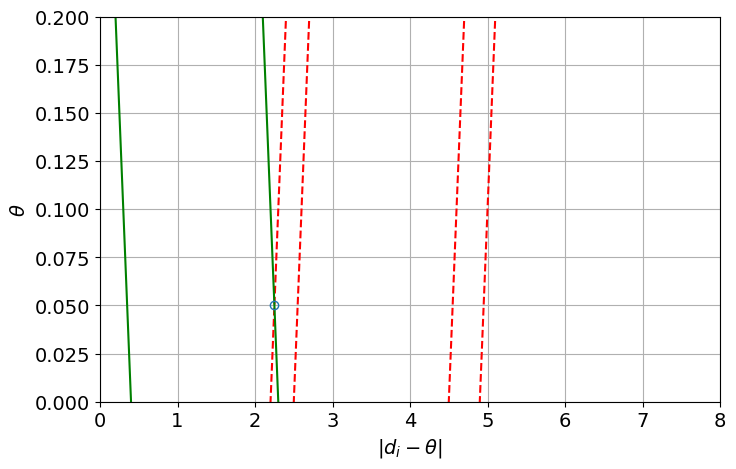

In [43]:
for i in range(n):
    plt.plot(d_i[i]-theta_t,theta_t,'g-',lw=1.5);plt.plot(theta_t-d_i[i],theta_t,'r--',lw=1.5);
plt.plot(2.25,0.05,'ko',mfc='None',mec='C0')
plt.grid();plt.xlabel(r'$|d_i-\theta|$');plt.ylabel(r'$\theta$');plt.xlim(0,8);plt.ylim(0,0.2);

The first time that happens is when $\theta=0.05$, because $-2.2 - 0.05 = -2.25 = - (2.3 - 0.05)$

In [44]:
theta = 0.05
d_i[np.argsort(np.abs(d_i-theta))]-theta

array([ 0.35, -2.25,  2.25, -2.55, -4.55, -4.95])

This crossing lowers the signed-rank statistic from $1+3=4$ to $1+2=3$.

The $\theta$ at which
it occurs is when $d_i - \theta = -(d_j - \theta)$ where $i$ and $j$
are the indices of the differences $d_i=-2.2$ and $d_j=2.3$.

This can be
solved for $$\theta = \frac{d_i+d_j}{2}$$ i.e., the signed rank
statistic changes by $1$ when $\theta$ crosses the average of two of the
differences.

If we keep going, we see that the next time the rank-sum statistic
changes is when $\theta=0.4$:

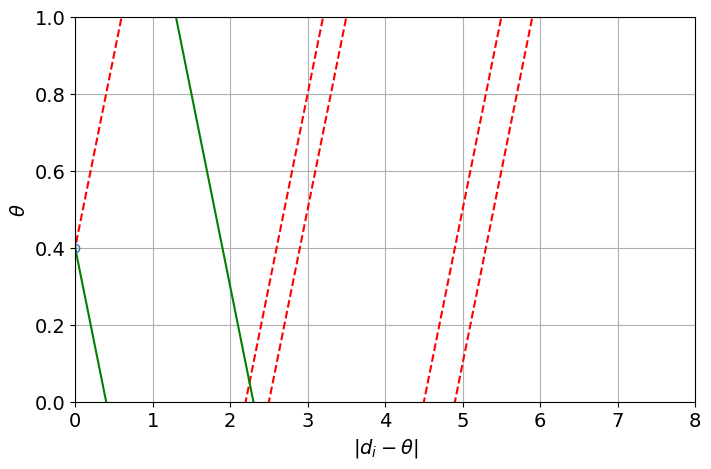

In [45]:
for i in range(n):
    plt.plot(d_i[i]-theta_t,theta_t,'g-',lw=1.5);plt.plot(theta_t-d_i[i],theta_t,'r--',lw=1.5);
plt.plot(0,0.4,'ko',mfc='None',mec='C0')
plt.grid(True);plt.xlabel(r'$|d_i-\theta|$');plt.ylabel(r'$\theta$');plt.xlim(0,8);plt.ylim(0,1);

In [46]:
theta = 0.4
d_i[np.argsort(np.abs(d_i-theta))]-theta

array([ 3.33066907e-16,  1.90000000e+00, -2.60000000e+00, -2.90000000e+00,
       -4.90000000e+00, -5.30000000e+00])

At this point, $d_i-\theta$ changes sign, where $i$ is the index of the
difference $d_i=0.4$, and the signed-rank statistic drops from $1+2=3$
to $2$. This means that for $\theta>0.4$ the signed-rank statistic will
be $\le 2$ and the two-sided $p$-value will be below $10\%$, so this is
the upper end of the 90% confidence interval.

So we see that the value of the signed-rank statistic changes by $1$
every time $\theta$ crosses the average of two differences
$\frac{d_i+d_j}{2}$, or an individual difference $d_i$ (which is the
average $\frac{d_i+d_i}{2}$):

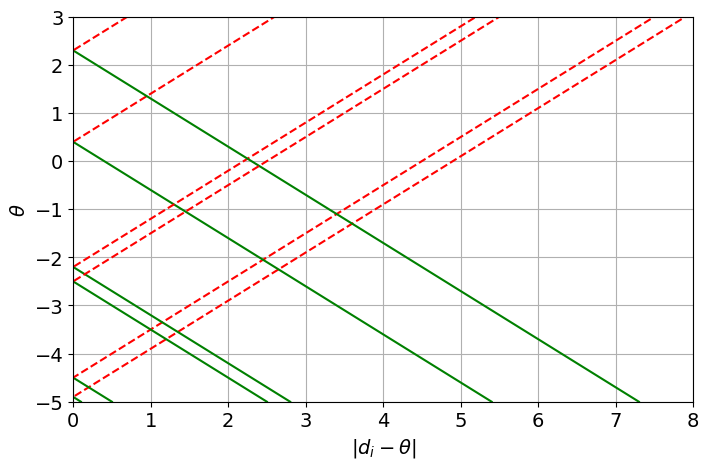

In [47]:
for i in range(n):
    plt.plot(d_i[i]-theta_t,theta_t,'g-',lw=1.5);plt.plot(theta_t-d_i[i],theta_t,'r--',lw=1.5);
plt.grid(True); plt.xlabel(r'$|d_i-\theta|$'); plt.ylabel(r'$\theta$'); plt.xlim(0,8); plt.ylim(-5,3);

So if we want to get the values of $\theta$ that fall between the three
highest and three lowest signed-rank statistic values, we just have to
list those values. It’s not quite the full list of averages
$\frac{d_i+d_j}{2}$ for all $i$ and $j$, since that would list the
differences with $i\ne j$ twice, and they only change the statistic by
one, not two:

In [48]:
0.5*(d_i[:,None]+d_i[None,:])

array([[-4.9 , -4.7 , -2.25, -3.55, -1.3 , -3.7 ],
       [-4.7 , -4.5 , -2.05, -3.35, -1.1 , -3.5 ],
       [-2.25, -2.05,  0.4 , -0.9 ,  1.35, -1.05],
       [-3.55, -3.35, -0.9 , -2.2 ,  0.05, -2.35],
       [-1.3 , -1.1 ,  1.35,  0.05,  2.3 , -0.1 ],
       [-3.7 , -3.5 , -1.05, -2.35, -0.1 , -2.5 ]])

Instead, we just need the list for $j\le i$:

In [49]:
from matplotlib.cbook import flatten
avg_a = np.sort(np.array(list(flatten([[0.5*(d_i[i]+d_i[j]) for j in range(i,n)] for i in range(n)]))))
avg_a

array([-4.9 , -4.7 , -4.5 , -3.7 , -3.55, -3.5 , -3.35, -2.5 , -2.35,
       -2.25, -2.2 , -2.05, -1.3 , -1.1 , -1.05, -0.9 , -0.1 ,  0.05,
        0.4 ,  1.35,  2.3 ])

Note that in the list of averages $\frac{d_i+d_j}{2}$ for
$i=1,\ldots,n$, $j=i,\ldots,n$, there will be $\frac{n(n+1)}{2}$
individual entries, which is consistent with the fact that the
signed-rank statistic can be any value from $0$ to $\frac{n(n+1)}{2}$.

So in particular, to get the 90% confidence interval when $n=6$, i.e.,
the range of $\theta$ values which give a signed-rank statistic greater
than $2$ and less than $19$, we need to take the 3rd and 19th numbers in
the sorted list of averages. In our case, that is from $-4.5$ to
$0.4$.

In [50]:
signrankppf(0.05,6), signrankcdf(18.5,6)-signrankcdf(2.5,6), signrankcdf(2,6), signrankcdf(3,6)

(3, 0.90625, 0.046875, 0.078125)

In [51]:
avg_a

array([-4.9 , -4.7 , -4.5 , -3.7 , -3.55, -3.5 , -3.35, -2.5 , -2.35,
       -2.25, -2.2 , -2.05, -1.3 , -1.1 , -1.05, -0.9 , -0.1 ,  0.05,
        0.4 ,  1.35,  2.3 ])

In [52]:
(avg_a[3-1],avg_a[19-1])

(-4.5, 0.40000000000000036)

$P(2<T_+<19)=P(3\le T_+\le 18)=P(2.5<T_+<18.5)$

Note that the point estimate, i.e., a 0% confidence interval, would be
the middle entry, number $\frac{n(n+1)}{4}$ out of $\frac{n(n+1)}{2}$ if
$n$ is even. This is not the sample median of the $\{d_i\}$, but rather
the median of the averages. This is known as the **Hodges-Lehmann
estimator**, and it’s actually estimating something called the
**pseudomedian**, which is the median of the averages of pairs of draws
from the population or distribution. For a symmetric distribution, the
median and pseudomedian (and mean, if it exists) are all the same.